# Abstract

### The goal of this research is to explain how Perlin Noise works, the problems it addresses, and the different ways of its implementation in various scenarios.
<hr>


<h2 style='text-align: center'>What is Perlin Noise? </h2>
<p> Perlin Noise is a <a href='https://en.wikipedia.org/wiki/Noise_(signal_processing)'>noise</a> generating algorithm, developed by Ken Perlin in 1983. By "noise" we shall understand the, seemingly, random range of values from 0 to 1. </p>
<p> It is often used in generating terrains/worlds in games such as Terraria, Minecraft and No Man's sky. </p>


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import noise

<p>Running the code in the cell below will shows what a random noise looks like when graphed.</p>

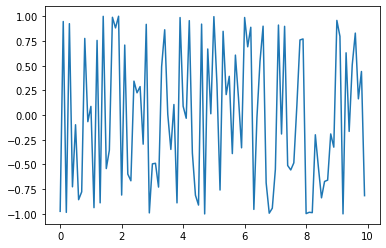

In [21]:
def generate_plot_random():
    x = np.arange(0,10, 0.1)
    y = np.sin(x + np.random.uniform(-10, 10, x.shape))

    plt.plot(x,y)
    plt.show()
generate_plot_random()

<p>If we were to use perlin noise to generate the same graph, the result would've looked a lot more harmonic, like this:</p>

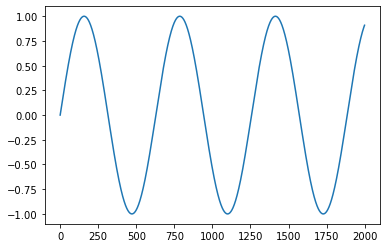

In [22]:
def generate_harmonic_noise():
    x = np.arange(0,20,0.01)
    y = np.sin(x)
    plt.plot(y)

generate_harmonic_noise()

<p><strong>Note:</strong> None of the plots shown above utilize perlin noise.</p>

<p>If we were to visualize the differences between randomly generated noise and perlin noise, they'd look like that: </p>
    <label>Random noise</label>
    <br>
    <img src='https://miro.medium.com/max/600/1*H6lwuHlprj1GYqRmav_Y2A.png'>
    <br>
    <label>Perlin noise</label>
    <br>
    <img src='https://miro.medium.com/max/4096/1*vs239SecVBaB4HvLsZ8O5Q.png' width='300px'>

<p>Both images are taken from <a href='https://medium.com/@yvanscher/playing-with-perlin-noise-generating-realistic-archipelagos-b59f004d8401'> here. </a> </p>


<h2 style="text-align: center"> Theory </h2>
<p>Perlin noise implementation is generally divided into 3 phases:</p>
<ul>
    <li> Defining a grid </li>
    <li> Generating random values for the grid </li>
    <li> Linearly Interploating between the values in the grid </li>
</ul>

<h3 style='text-align: center'>1. Defining a grid </h3>
<p>In order to understand what the grid is, I want you to imagine the following - It is 2007 and you're playing minesweeper on a windows XP computer. Everything that you see, every single tile that you can click on and see whether it has a mine or a number below itself, on the game window makes up the entire grid. This is what the grid is in perlin noise.
</p>

<p> We fill that grid with random values/noise and then we do mathematical operations upon them. The grid is either 2D or 3D, it could also be 1D. It all depends on what we are trying to do.</p>

<p>For the sake of simplicity, and aesthetical results, we'll define a 2D grid and hence our perlin noise will be 2 dimensional.</p>
<!-- TODO add graphics, showing what the grid looks like !--> 

<h3 style='text-align: center'>2. Generating random values for the grid</h3>
<p>What we have to do here is - generate random values for each part of the grid. </p> 
<p>if we go back to the minewsweeper analogy then we can imagine each part of the grid as each tile on the game window. What we want is to fill each tile with random values; there's one catch, however, we have to do that in such a way that when we give in a certain value(also known as seed), we'll receive the same result, for the said tile/grid part - that is when gradient vectors come into play.</p>
<p><strong>Gradient Vectors</strong> are, basically, a random vector. If we, as developers, imagine the vector as an array then it contains random values from -1 to 1. The crucial fact here is that, whenever we send some input toward the gradient vector generating function, it <strong>always</strong> returns the same values/coordinates.</p>

<p>This image shows gradient vectors(red), graphed on our grid: </p>
<br>
<img src='https://upload.wikimedia.org/wikipedia/commons/0/09/PerlinNoiseGradientGrid.png'>
<br>
<a href='https://en.m.wikipedia.org/wiki/Perlin_noise#Grid_definition'>Source</a>


<h3 style='text-align: center'>3. Linearly interpolating between the values in the grid</h3>
<p>Since linear interpolation sounds scary, I'll attempt to explain it layman's terms:</p> 
<p> Assuming that we have a large amount of random points scattered on a plot and we try to connect them with a line, the result would be chaotic - we'll see wiggles all over the place. That won't happen if we use linear interpolation, or simply said - linear interpolation is the act of making the line crossing through the random points straight, smoother and more aesthetically appealing - no wiggles.</p>

<p>If you are interested in other layman's terms explanations, you can find them <a href='https://www.reddit.com/r/explainlikeimfive/comments/cynq3r/eli5_what_is_linear_interpolation/'>here.</a></p>
<!-- TODO show the chaotic and interpolated graphs !-->


<h2 style="text-align: center"> Perlin Noise Implementation </h2>
